In [1]:
import eigensheep

In [ ]:
%%eigensheep -n 25 --memory 3008 numpy matplotlib 

# This is where we select which tile to render in this worker
Xo, Yo = INDEX % 5, INDEX // 5

import matplotlib as mpl
mpl.use('Agg')

from matplotlib import colors
import numpy as np
import time
import matplotlib.pyplot as plt

def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float64)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float64)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex128)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


R = 3.0E-7
X = -0.745428 - 3 *R
Y = 0.113009


xmin, xmax, xn = X-R+2*R*Xo, X+R+2*R*Xo, 1500/2
ymin, ymax, yn = Y-R+2*R*Yo, Y+R+2*R*Yo, 1500/2

maxiter = 1000
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon))/np.log(2)

start = time.time()
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 -
                      np.log(np.log(abs(Z)))/np.log(2) +
                      log_horizon)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
Mshade = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')



print(time.time() - start, Mshade.shape)

Mshade

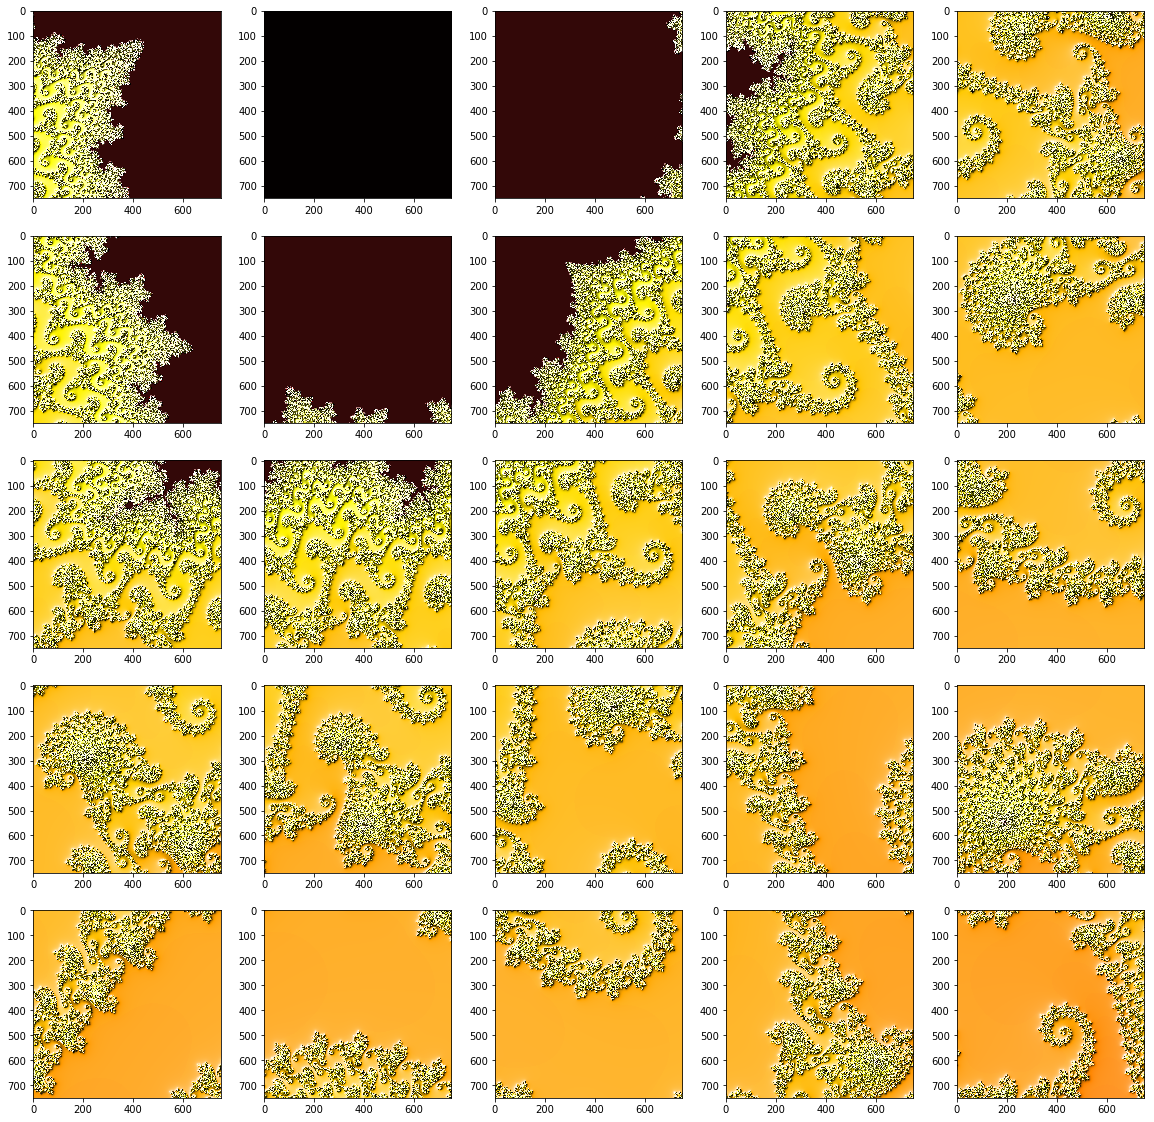

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = Out[2][i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [4]:
from PIL import Image
import numpy as np

canvas = np.zeros((5*750, 5*750, 4))

for i in range(5):
    for j in range(5):
        canvas[(i*750):(i + 1)*750,(j*750):(j + 1)*750,:] = Out[2][i*5 + j]
        
img = Image.fromarray((canvas * 255).astype(np.uint8), 'RGBA')
img.show()